# Advertising Sales Channel Prediction
# Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Importing Required Liberaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Datatrained/Practice Project/Advertising Sales Channel Prediction/Advertising.csv")

In [3]:
df.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
123,124,123.1,34.6,12.4,15.2
144,145,96.2,14.8,38.9,11.4
160,161,172.5,18.1,30.7,14.4
175,176,276.9,48.9,41.8,27.0
32,33,97.2,1.5,30.0,9.6


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# EDA

In [7]:
data = df.drop(columns = ["Unnamed: 0"], axis=1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In the datasets, feature sales is Dependent feature and rest of other feature like TV, radio and newspaper are independent feature.

In [8]:
data.isnull().mean()

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

# Data Visualization to see the Correlation

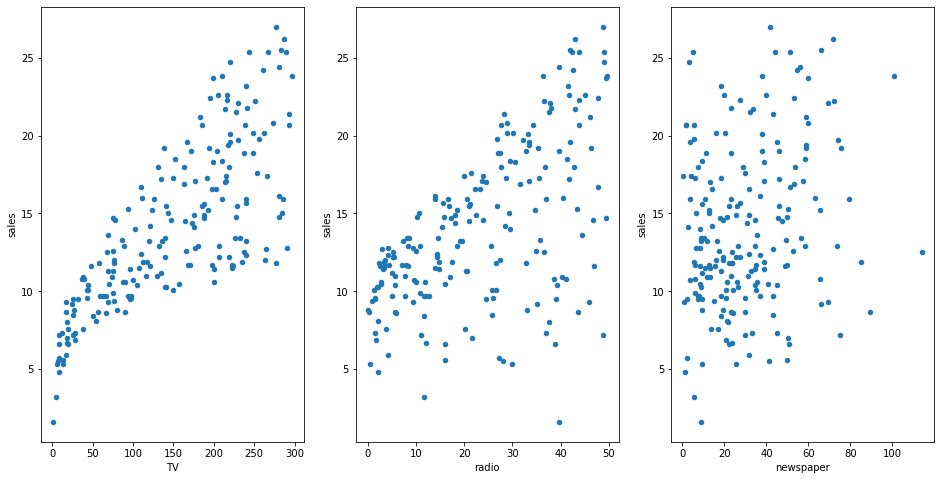

In [9]:
fig, axs = plt.subplots(1,3)
data.plot(kind='scatter', x = 'TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x = 'radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x = 'newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg')

# Bivariate analysis

<AxesSubplot:title={'center':'comparison between Tv and Sales'}, xlabel='TV', ylabel='sales'>

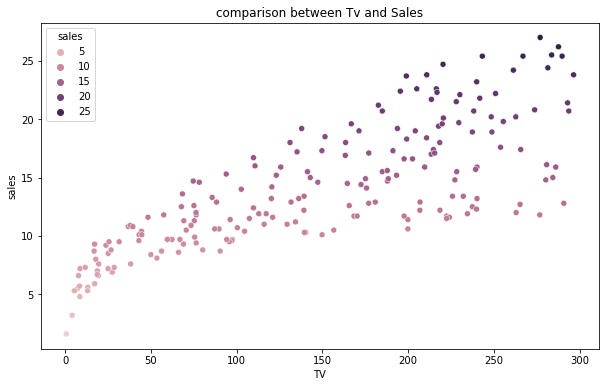

In [127]:
plt.figure(figsize=[10,6])
plt.title("comparison between Tv and Sales")
sns.scatterplot(data['TV'],data['sales'],hue=data["sales"])

It gives the number of Tv in sales

<AxesSubplot:title={'center':'comparison between radio and Sales'}, xlabel='radio', ylabel='sales'>

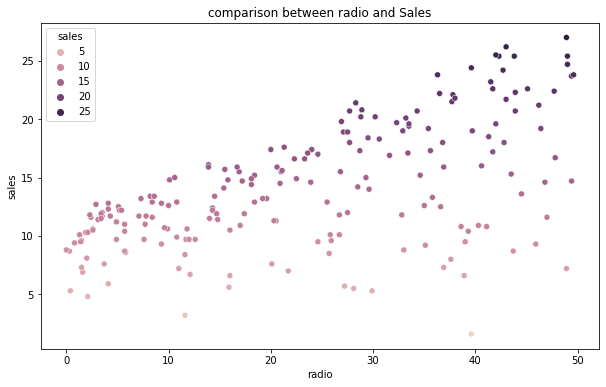

In [130]:
plt.figure(figsize=[10,6])
plt.title("comparison between radio and Sales")
sns.scatterplot(data['radio'],data['sales'],hue=data["sales"])

In [ ]:
It gives the number of radio in sales

<AxesSubplot:title={'center':'comparison between newspaper and Sales'}, xlabel='newspaper', ylabel='sales'>

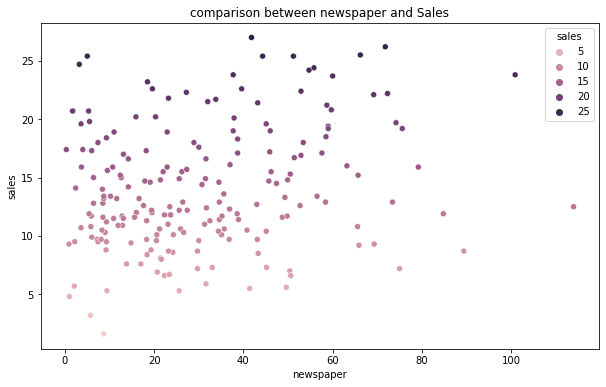

In [129]:
plt.figure(figsize=[10,6])
plt.title("comparison between newspaper and Sales")
sns.scatterplot(data['newspaper'],data['sales'],hue=data["sales"])

It gives the number of newspaper in sales

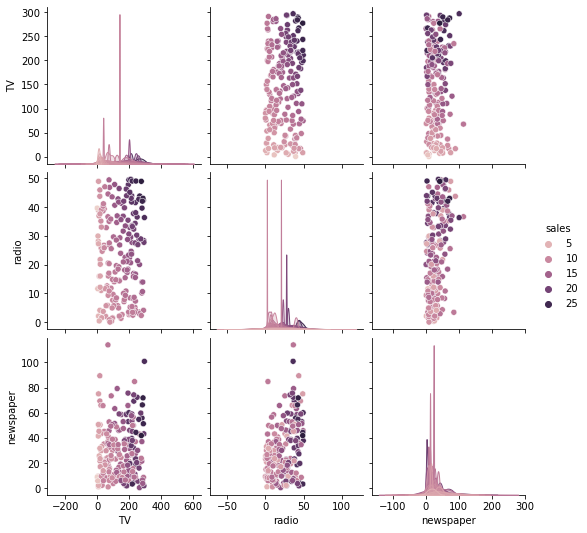

In [132]:
#Pairplot
sns.pairplot(data,hue='sales')

It gives the the scatterplot of each column against each independent variables

# Data Distribution and skewness checking

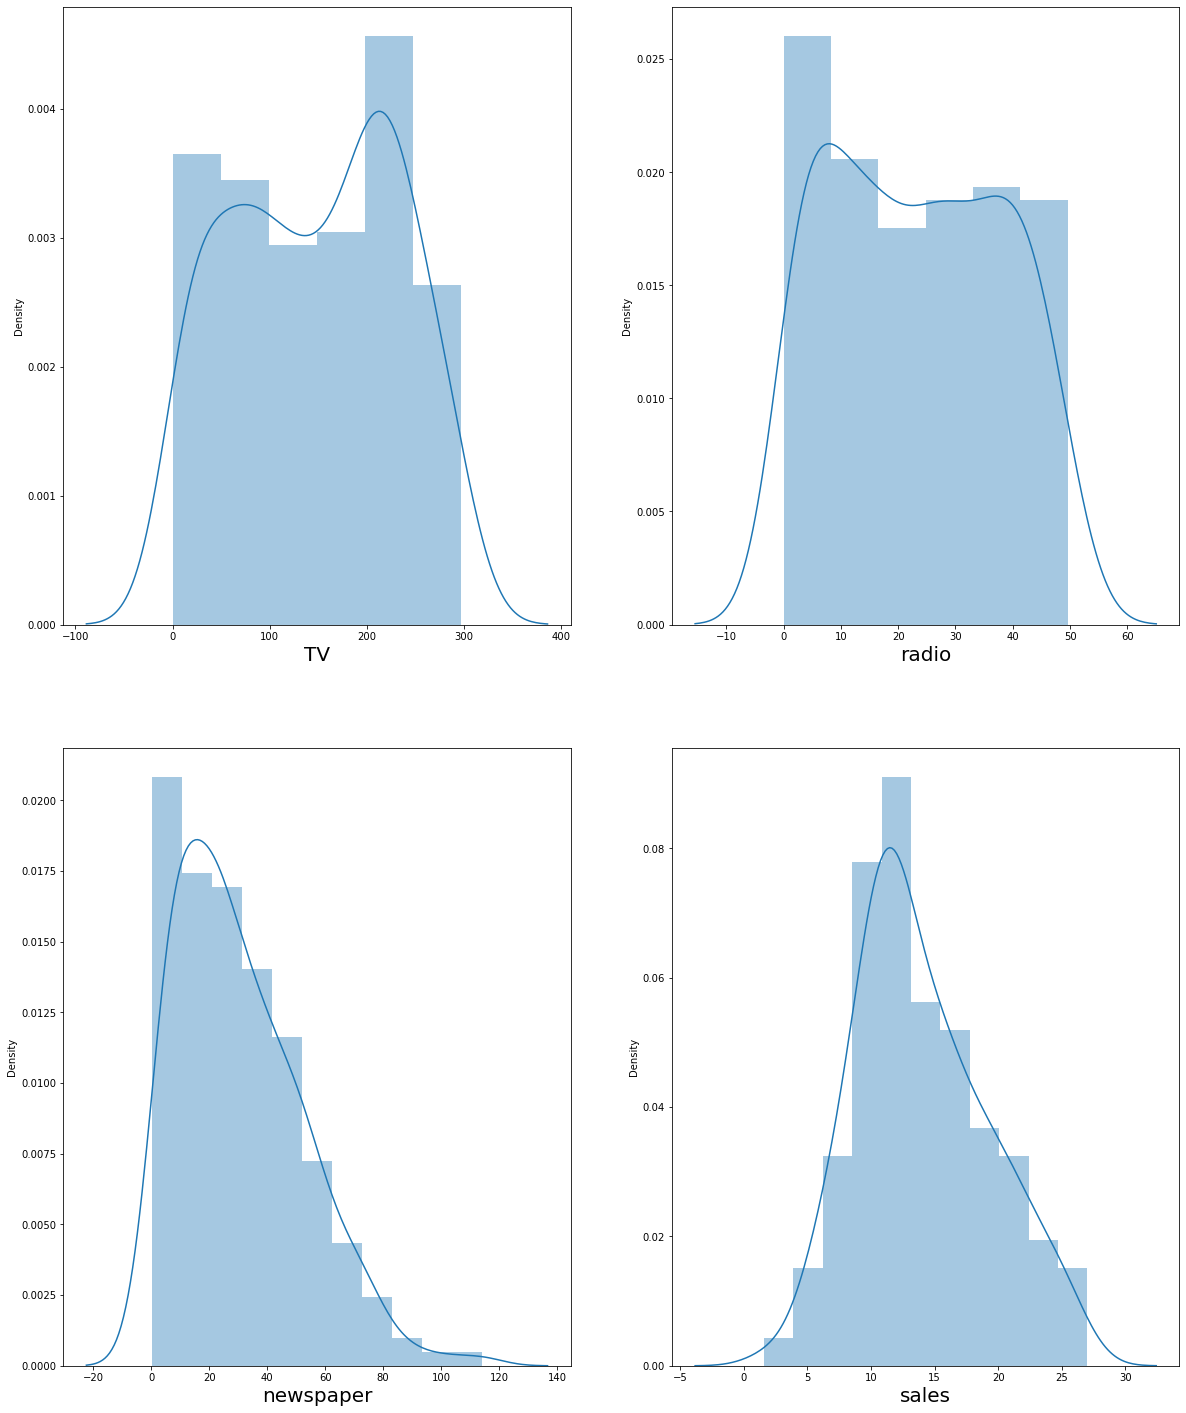

In [10]:
# lets see how data are distributed in every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=4 : #As the number of columns are 4 in datasets
        ax = plt.subplot(2,2, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

Dataset does not have skewness as per graph but can be guessed for newspaper which seems right skewed. We will handle it in further steps

In [11]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [12]:
#devide the data into feature and labels
y = data['sales']
x = data.drop(columns = ['sales'])

In [13]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

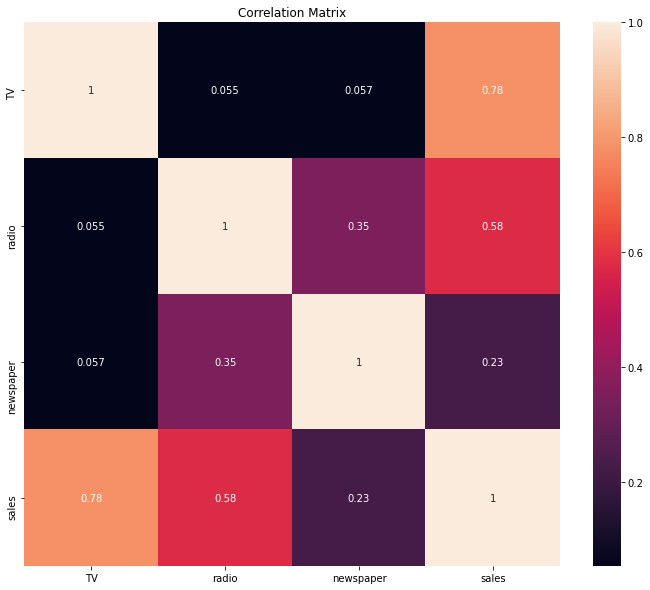

In [15]:
import seaborn as sns
corr_mat = data.corr()
plt.figure(figsize=[12,10])
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()

In Correlation Matrix we have observed that TV and Radio are playing major roles in increasing the sales but newspaper contributing least in increasing sales

# Handle Skewness in datasets

In [16]:
from sklearn.preprocessing import power_transform
x_new = power_transform(data)
#will convert data into dataframe for further use after transforming dataset from arrays
x1 = pd.DataFrame(x_new, columns=data.columns)

In [17]:
x1.skew().sort_values(ascending=False)

sales       -0.007841
newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [18]:
x1.shape

(200, 4)

# Scaling

In [19]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x1)

In [20]:
x_scaled

array([[ 9.48674291e-01,  9.62246888e-01,  1.51433531e+00,
         1.46441197e+00],
       [-1.19131426e+00,  1.04017880e+00,  7.87682518e-01,
        -6.50692513e-01],
       [-1.64775660e+00,  1.37070964e+00,  1.51699753e+00,
        -8.94549951e-01],
       [ 1.41020233e-01,  1.14238689e+00,  1.21465643e+00,
         8.82528036e-01],
       [ 4.52714928e-01, -7.48650643e-01,  1.21170398e+00,
        -1.34549801e-01],
       [-1.82382233e+00,  1.51501853e+00,  1.66502354e+00,
        -1.39687742e+00],
       [-1.00249116e+00,  6.93727035e-01, -1.07753498e-01,
        -3.55780023e-01],
       [-2.10275002e-01, -1.01585443e-01, -8.44093412e-01,
        -7.56544391e-02],
       [-1.82609501e+00, -1.63345378e+00, -2.13259669e+00,
        -2.05242372e+00],
       [ 6.47644918e-01, -1.56676988e+00, -2.29003949e-01,
        -6.07561054e-01],
       [-8.83773778e-01, -1.20298758e+00, -7.22615630e-02,
        -1.05614129e+00],
       [ 7.97083554e-01,  1.80725788e-01, -1.60261898e+00,
      

In [21]:
x2 = pd.DataFrame(x_scaled, columns = x1.columns)
x2

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550
...,...,...,...,...
195,-1.287908,-1.431436,-0.682576,-1.296912
196,-0.520949,-1.297017,-1.142011,-0.804523
197,0.413091,-0.875492,-1.313050,-0.154314
198,1.455843,1.177722,1.433350,1.975967


# Checking Outliers

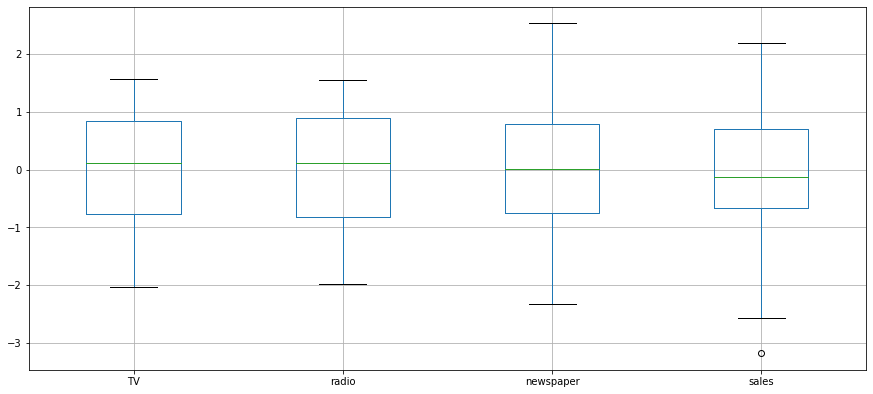

In [22]:
#Ploting box plots for first 30 columns
x2.boxplot(figsize=[15,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we do not see any major outliers except a single point in target feature which will be quantify once to make sure no major counts in outliers

# Lets Quantify the outliers

In [70]:
from scipy.stats import zscore

In [76]:
z=np.abs(zscore(x2))
new_df=x2[(z<3).all(axis=1)]

In [77]:
new_df

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550
...,...,...,...,...
195,-1.287908,-1.431436,-0.682576,-1.296912
196,-0.520949,-1.297017,-1.142011,-0.804523
197,0.413091,-0.875492,-1.313050,-0.154314
198,1.455843,1.177722,1.433350,1.975967


In [78]:
new_df.shape

(199, 4)

outlier have been removed from the dataset

# Dividing data in feature and vectors

In [80]:
x = new_df.drop(["sales"], axis=1)
y = new_df["sales"]

In [81]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 9.46019403e-01,  9.67843321e-01,  1.50958249e+00],
       [-1.21129501e+00,  1.04579873e+00,  7.82589407e-01],
       [-1.67143281e+00,  1.37642924e+00,  1.51224595e+00],
       [ 1.31826384e-01,  1.14803764e+00,  1.20976327e+00],
       [ 4.46044634e-01, -7.43570109e-01,  1.20680943e+00],
       [-1.84892401e+00,  1.52078164e+00,  1.66034129e+00],
       [-1.02094315e+00,  6.99242500e-01, -1.13265938e-01],
       [-2.22313021e-01, -9.63097950e-02, -8.49950677e-01],
       [-1.85121510e+00, -1.62864005e+00, -2.13905736e+00],
       [ 6.42552824e-01, -1.56193604e+00, -2.34573170e-01],
       [-9.01264606e-01, -1.19804405e+00, -7.77573824e-02],
       [ 7.93201351e-01,  1.86086564e-01, -1.60883146e+00],
       [-1.54911009e+00,  8.24558870e-01,  1.42033465e+00],
       [-4.94593198e-01, -1.02314016e+00, -1.23586296e+00],
       [ 6.86325221e-01,  7.04757430e-01,  8.13527163e-01],
       [ 5.97503230e-01,  1.46344942e+00,  1.03935051e+00],
       [-8.78104545e-01,  9.04647369e-01

In [82]:
x_scaled.shape[1]

3

# Checking Multicollinearity Using Variance Inflation Factor

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
#lets check the values
vif

,vif,Features
0,1.003699,TV
1,1.101146,radio
2,1.098355,newspaper


There are no multicollinearity issue observed in the dataset since VIF values are less than value 5 in each features.

# Split Dataset for training and testing the model

In [84]:
#Split data in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=323)

In [85]:
X_train

array([[-2.22313021e-01, -9.63097950e-02, -8.49950677e-01],
       [-1.52786309e+00, -7.27131251e-01,  1.82043251e-01],
       [ 1.43680684e+00,  1.06125601e+00,  1.12890185e+00],
       [-1.94089832e-02,  1.40072747e+00,  1.22448646e+00],
       [ 7.14696740e-01, -9.49974545e-01,  3.00138099e-02],
       [-9.53608937e-01, -5.99186552e-01, -3.99206437e-01],
       [ 8.55197599e-02,  1.79890561e-01, -3.52339789e-01],
       [-3.08261665e-01, -2.46109866e-01,  5.47155454e-01],
       [-2.71588896e-01, -1.01385652e+00, -1.33839571e-01],
       [-1.67143281e+00,  1.37642924e+00,  1.51224595e+00],
       [ 2.73061168e-01, -1.06652147e-02,  8.60930951e-01],
       [ 9.25344095e-01,  9.62605762e-01,  2.82095833e-01],
       [-9.01264606e-01, -1.19804405e+00, -7.77573824e-02],
       [-5.16861088e-01, -1.72942734e+00, -1.21584185e+00],
       [ 7.13685231e-01, -1.26017677e+00, -3.35063284e-01],
       [-4.07790050e-01, -1.20824953e+00,  3.81990231e-01],
       [-1.20826495e+00,  2.96046706e-01

In [86]:
y_train

7     -0.075654
106   -1.396877
17     1.814026
105    0.999385
43    -0.134550
         ...   
195   -1.296912
175    2.191797
44    -1.079671
48     0.229055
185    1.541757
Name: sales, Length: 149, dtype: float64

# Model Instantiating and training

Since Target/Labelled data shows continous Variable so the dataset belongs to a Regression model

# Linear Regression Algorithm

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [88]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
pred=lr.predict(X_test)

In [90]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 0.06598273660631995
mean absolute error 0.1968326812926287
r2 score 0.9133485412051042


In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
score=cross_val_score(lr,x,y,cv=5)

In [93]:
print(score)
print(score.mean())
print(score.std())

[0.91851976 0.92727468 0.93257193 0.90468182 0.92623225]
0.9218560883062505
0.009689454422374236


# Ridge

In [94]:
from sklearn.linear_model import Ridge

In [95]:
rd=Ridge()
rd.fit(X_train,y_train)
pred=rd.predict(X_test)

In [96]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 0.06629293953422687
mean absolute error 0.1970013782560914
r2 score 0.9118613541977872


In [97]:
score=cross_val_score(rd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.91841946 0.92679553 0.93402693 0.90364829 0.926563  ]
0.9218906428173896
0.010373146908282355


# Lasso

In [98]:
from sklearn.linear_model import Lasso

In [99]:
ls=Lasso()
ls.fit(X_train,y_train)
pred=ls.predict(X_test)

In [100]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.8654013760842133
mean_absolute_error 0.7384488960769632
r2_score -0.003332276458261063


In [101]:
score=cross_val_score(ls,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.00106376 -0.01549944 -0.02410547 -0.03301725 -0.00342281]
-0.015421746183206686
0.012125519148789787


# ElasticNet

In [102]:
from sklearn.linear_model import ElasticNet

In [103]:
en=ElasticNet()
en.fit(X_train,y_train)
pred=en.predict(X_test)

In [104]:
print('mean_squared_error',mean_squared_error(pred,y_test))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.5805578751593508
mean_absolute_error 0.6071637978647833
r2_score 0.3269106444745018


In [105]:
score=cross_val_score(en,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.32552535 0.27593546 0.28794028 0.28404696 0.2767232 ]
0.29003425160761126
0.01830743366913518


# support vector machine

In [106]:
from sklearn.svm import SVR

In [107]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)

In [108]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.018445009756532987
mean_absolute_error 0.09674442620734759
r2_score 0.9786151557649982


In [109]:
score=cross_val_score(svr,x,y,cv=5)

In [110]:
print(score)
print(score.mean())
print(score.std())

[0.95531711 0.97859275 0.97740425 0.94857465 0.98868024]
0.9697138006961774
0.015177833224349522


# Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [113]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 0.0478784591006489
mean_absolute_error 0.16310276555838457
r2_score 0.9444904934400137


In [114]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.97224536 0.9347293  0.96174496 0.9439163  0.94134304]
0.9507957933219153
0.013962678273589409


# RandomForest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [117]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))  
print('r2 score',r2_score(pred,y_test))

mean_squared_error 0.020849578726535235
mean_absolute_error 0.11742964729026471
r2 score 0.9726846388592376


In [118]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.97411014 0.95020597 0.9499817  0.94764235 0.9376225 ]
0.951912529875911
0.01201510491996426


Out of all the algorithms we have found Random Forest regresser performing better 

# Hyperparameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
model=RandomForestRegressor()
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}

In [121]:
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)

In [122]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})

In [123]:
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})
0.9724502888357097
mae
{'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


# Saving Model

In [124]:
import joblib

In [125]:
joblib.dump(RandomForestRegressor,'Advertising_sales.obj')

['Advertising_sales.obj']